# **Trabalho de Redes Neurais: Detec√ß√£o de Discurso de √ìdio utilizando BiLSTM e Word2Vec**

**Objetivo:** Este notebook implementa e avalia o modelo de deep learning BiLSTM junto do vetorizador Word2Vec para a tarefa de detec√ß√£o de discurso de √≥dio em tweets.

**Dataset:** Utiliza-se o MMHS150K, um conjunto de dados com 150.000 tweets contendo texto e imagem. Para esta primeira parte do trabalho, **focaremos exclusivamente na modalidade de texto.**

**Estrat√©gia:**
Ap√≥s uma an√°lise inicial, observou-se um forte desbalanceamento entre as classes e, com isso, decidiu-se tratar como um problema bin√°rio ao inv√©s de multiclasse, que, mesmo assim, ainda mantinha um alto desbalanceamento. Por esse motivo vamos implementar e comparar duas estrat√©gias distintas para tratar esse desbalanceamento em um problema de classifica√ß√£o bin√°ria ("Hate" vs. "N√£o Hate"):
1. **M√©todo 1:** Undersampling. Balancear o conjunto de treino cortando amostras da classe majorit√°ria.
2. **M√©todo 2:** Perda Ponderada (Weighted Loss). Usar o conjunto de treino completo, mas aplicando pesos na fun√ß√£o de perda para dar mais import√¢ncia √† classe minorit√°ria.

O objetivo final √© determinar qual das duas abordagens produz um modelo mais eficaz e robusto para a detec√ß√£o de discurso de √≥dio.

# **Configura√ß√£o do Ambiente**

## **Instala√ß√µes**

In [2]:
!pip install gensim scikit-learn pandas matplotlib torch keras nltk

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.7/26.7 MB 31.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 122.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 91.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

## **Imports**

In [18]:
import os
import json
from collections import Counter
import nltk
import numpy as np
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from gensim.models import Word2Vec
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Carregamento e An√°lise Explorat√≥ria dos Dados (EDA)**

O primeiro passo da an√°lise √© carregar os dados e entender sua estrutura. Realizamos uma an√°lise explorat√≥ria na distribui√ß√£o original de 6 classes para visualizar o desbalanceamento inicial, que motiva a simplifica√ß√£o do problema e a necessidade de t√©cnicas de tratamento.

## **Carregamento dos Dados**

In [19]:
import kagglehub

path = kagglehub.dataset_download("victorcallejasf/multimodal-hate-speech")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/multimodal-hate-speech


In [20]:
print(os.listdir(path))

['splits', 'img_resized', 'img_txt', 'hatespeech_keywords.txt', 'MMHS150K_readme.txt', 'MMHS150K_GT.json']


In [21]:
json_gt_path = os.path.join(path, "MMHS150K_GT.json")

splits = {
    "Treino": os.path.join(path, "splits", "train_ids.txt"),
    "Valida√ß√£o": os.path.join(path, "splits", "val_ids.txt"),
    "Teste": os.path.join(path, "splits", "test_ids.txt"),
}


with open(json_gt_path, 'r') as f:
    data = json.load(f)

def contar_tweets(split_path):
    with open(split_path, 'r') as f:
        ids = [line.strip() for line in f.readlines()]
    return len([id_ for id_ in ids if id_ in data])

for nome_split, caminho_split in splits.items():
    total_tweets = contar_tweets(caminho_split)
    print(f"{nome_split}: {total_tweets} tweets")

Treino: 134823 tweets
Valida√ß√£o: 5000 tweets
Teste: 10000 tweets


## **An√°lise da Distribui√ß√£o Multiclasse Original**

Distribui√ß√£o Original das Classes no Conjunto Treino:
       Classe  Quantidade
1  N√£o √© hate      108462
0     Racista       11333
4       Outro        6528
2     Sexista        4298
3  Homof√≥bico        3922
5    Religi√£o         280


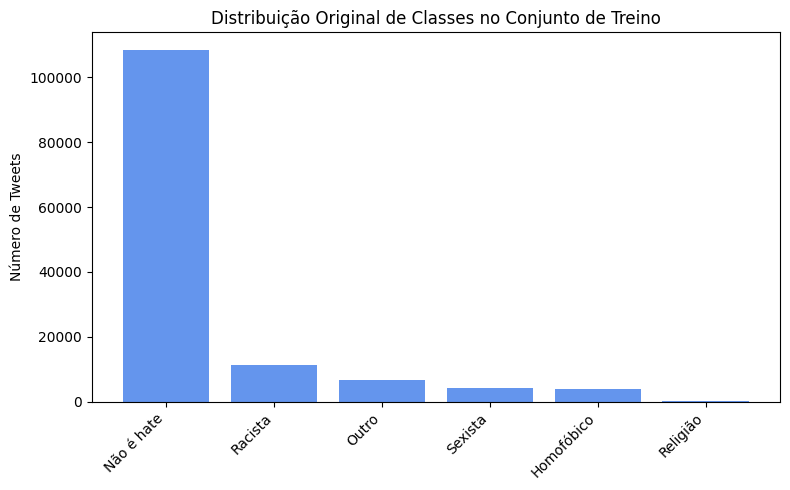

Distribui√ß√£o Original das Classes no Conjunto Valida√ß√£o:
       Classe  Quantidade
4  N√£o √© hate        2755
2     Racista         966
3       Outro         562
0     Sexista         366
1  Homof√≥bico         324
5    Religi√£o          27


Distribui√ß√£o Original das Classes no Conjunto Teste:
       Classe  Quantidade
3  N√£o √© hate        5573
0     Racista        1884
1       Outro        1106
4     Sexista         711
2  Homof√≥bico         680
5    Religi√£o          46


In [22]:
def carregar_dados_singlelabel(split_path, path_name):
    with open(split_path, 'r') as f:
        ids = [line.strip() for line in f.readlines()]
    texts = []
    labels = []
    for id_ in ids:
        if id_ in data:
            texts.append(data[id_]['tweet_text'])
            label_list = data[id_]['labels']  # ex: [0, 1, 1]
            most_common = Counter(label_list).most_common(1)[0][0]
            #if(most_common > 1): most_common = 1
            labels.append(most_common)  # pega a label majorit√°ria

    # Mapeamento para nomes leg√≠veis
    labels_map_multiclass = {
        0: "N√£o √© hate", 1: "Racista", 2: "Sexista",
        3: "Homof√≥bico", 4: "Religi√£o", 5: "Outro"
    }

    # Conta e plota a distribui√ß√£o
    original_label_counts = Counter(labels)
    df_dist_multi = pd.DataFrame({
        'Classe': [labels_map_multiclass[label] for label, count in original_label_counts.items()],
        'Quantidade': [count for label, count in original_label_counts.items()]
    }).sort_values(by='Quantidade', ascending=False)

    print(f"Distribui√ß√£o Original das Classes no Conjunto {path_name}:")
    print(df_dist_multi)

    # Plotando o gr√°fico
    plt.figure(figsize=(8, 5))
    plt.bar(df_dist_multi['Classe'], df_dist_multi['Quantidade'], color='cornflowerblue')
    plt.title(f'Distribui√ß√£o Original de Classes no Conjunto de {path_name}')
    plt.ylabel('N√∫mero de Tweets')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return texts, labels

train_texts, train_labels = carregar_dados_singlelabel(splits['Treino'], "Treino")
val_texts, val_labels = carregar_dados_singlelabel(splits['Valida√ß√£o'], "Valida√ß√£o")
test_texts, test_labels = carregar_dados_singlelabel(splits['Teste'], "Teste")

# **Binariza√ß√£o**

Devido ao desbalanceamento entre as classes "Hate" e "N√£o Hate" no dataset, optou-se por tratar o problema como uma classifica√ß√£o bin√°ria, focando apenas em distinguir os tweets como pertencentes a uma das duas categorias. Essa binariza√ß√£o simplifica a tarefa e permite uma avalia√ß√£o mais clara do modelo.

In [23]:
def binarizacao(labels):
    for i, label in enumerate(labels):
        if label >= 1:
            labels[i] = 1
    return labels

train_labels = binarizacao(train_labels)
test_labels = binarizacao(test_labels)
val_labels = binarizacao(val_labels)

print(f"Distribui√ß√£o Treino: N√£o Hate - {train_labels.count(0)} / Hate - {train_labels.count(1)}")
print(f"Distribui√ß√£o Teste: N√£o Hate - {test_labels.count(0)} / Hate - {test_labels.count(1)}")
print(f"Distribui√ß√£o Valida√ß√£o: N√£o Hate - {val_labels.count(0)} / Hate - {val_labels.count(1)}")

Distribui√ß√£o Treino: N√£o Hate - 108462 / Hate - 26361
Distribui√ß√£o Teste: N√£o Hate - 5573 / Hate - 4427
Distribui√ß√£o Valida√ß√£o: N√£o Hate - 2755 / Hate - 2245


# **Pr√©-processamento**

Antes de alimentar os dados no modelo, √© necess√°rio realizar algumas etapas de pr√©-processamento no texto dos tweets. Isso inclui a remo√ß√£o de caracteres especiais, links, e a tokeniza√ß√£o, que consiste em dividir os textos em palavras individuais. Tamb√©m √© realizada a remo√ß√£o de stopwords (palavras comuns que n√£o contribuem para o significado, como "e", "a", "o"), al√©m da convers√£o dos textos para min√∫sculas, para garantir consist√™ncia e evitar duplica√ß√µes. Essas etapas s√£o fundamentais para limpar os dados e preparar o modelo para aprender padr√µes relevantes.

In [24]:
# Carregar stopwords uma vez
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()

    # Substituir URLs e men√ß√µes
    text = re.sub(r"http\S+|www\S+|https\S+", "<url>", text)
    text = re.sub(r"@\w+", "<user>", text)

    # Substituir hashtags mantendo a palavra
    text = re.sub(r"#(\w+)", r"\1", text)

    # Substituir emojis/emoticons por tags opcionais (pode usar emoji lib se quiser mais)
    text = re.sub(r"[^\w\s]", "", text)  # remove pontua√ß√£o

    # Reduzir repeti√ß√µes de letras (ex: coooool ‚Üí cool)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    return text

def normalize_obfuscated_words(tokens):
    """Substitui varia√ß√µes t√≠picas ofensivas por palavras padr√£o (ex: f@gg0t ‚Üí faggot)"""
    replacements = {
        r'b[\W_]*[i1!|][\W_]*t[\W_]*c[\W_]*h': 'bitch',
        r'f[\W_]*[a4@][\W_]*g[\W_]*g[\W_]*[o0][\W_]*t': 'faggot',
        r'n[\W_]*[i1!][\W_]*g[\W_]*g[\W_]*[e3][\W_]*[r4]': 'nigger',
        r'c[\W_]*[u*#][\W_]*n[\W_]*t': 'cunt',
        r'w[\W_]*h[\W_]*[o0][\W_]*r[\W_]*e': 'whore',
        r's[\W_]*l[\W_]*[u5][\W_]*t': 'slut',
        r'a[\W_]*s[\W_]*s[\W_]*h[\W_]*[o0][\W_]*l[\W_]*e': 'asshole',
        r't[\W_]*r[\W_]*a[\W_]*n[\W_]*n[\W_]*[y¬•]': 'tranny',
        r'r[\W_]*[e3][\W_]*[t+][\W_]*a[\W_]*[r4][\W_]*d': 'retard'
    }
    normalized = []
    for token in tokens:
        replaced = token
        for pattern, standard in replacements.items():
            if re.fullmatch(pattern, token):
                replaced = standard
                break
        normalized.append(replaced)
    return normalized

def preprocess(text, remove_stopwords=False):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = normalize_obfuscated_words(tokens)
    if remove_stopwords:
        tokens = [t for t in tokens if t not in stop_words]
    return tokens

In [25]:

tokenized_train_texts = [preprocess(text) for text in train_texts]
tokenized_val_texts = [preprocess(text) for text in val_texts]
tokenized_test_texts = [preprocess(text) for text in test_texts]

# **Treinamento do Modelo Word2Vec**

O modelo Word2Vec √© utilizado para converter palavras em vetores num√©ricos densos, representando semelhan√ßas sem√¢nticas entre elas. Para treinar o Word2Vec, os textos dos tweets, ap√≥s o pr√©-processamento, s√£o usados para criar um vocabul√°rio. O modelo √© treinado com esses dados para gerar embeddings de palavras, onde palavras semelhantes s√£o representadas por vetores pr√≥ximos no espa√ßo vetorial. O Word2Vec captura as rela√ß√µes sem√¢nticas entre as palavras e √© essencial para transformar o texto em uma representa√ß√£o num√©rica que o modelo de rede neural pode entender.

In [26]:

word2vec_model = Word2Vec(sentences=tokenized_train_texts, vector_size=100, window=5, min_count=1, workers=4)


In [27]:

vocab = {word: idx + 1 for idx, word in enumerate(word2vec_model.wv.index_to_key)}
vocab_size = len(vocab) + 1
embedding_dim = word2vec_model.vector_size

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, idx in vocab.items():
    embedding_matrix[idx] = word2vec_model.wv[word]


# **Transforma√ß√£o dos Dados**

Ap√≥s o treinamento do Word2Vec, os dados precisam ser transformados em um formato adequado para o modelo BiLSTM. Isso envolve converter as palavras dos tweets em vetores utilizando os embeddings gerados pelo Word2Vec. Cada tweet √© representado por uma sequ√™ncia de vetores, onde cada vetor corresponde a uma palavra do tweet. Al√©m disso, os tweets podem ter tamanhos diferentes, ent√£o, √© necess√°rio padronizar o tamanho das sequ√™ncias para que todas as entradas tenham o mesmo comprimento. Isso √© feito atrav√©s de padding, garantindo que as sequ√™ncias mais curtas sejam preenchidas com valores nulos.

In [28]:
MAX_LEN = 50  # ou 100, dependendo do comprimento m√©dio dos seus tweets

def tokens_to_indices(tokens_list, vocab):
    return [[vocab.get(token, 0) for token in tokens] for tokens in tokens_list]

train_sequences = tokens_to_indices(tokenized_train_texts, vocab)
val_sequences = tokens_to_indices(tokenized_val_texts, vocab)
test_sequences = tokens_to_indices(tokenized_test_texts, vocab)

train_padded = pad_sequences(train_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=MAX_LEN, padding='post', truncating='post')

# **Defini√ß√£o das Classes Necess√°rias ao Treinamento e Testes**

In [29]:

class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return torch.tensor(self.texts[idx]), torch.tensor(self.labels[idx])


In [30]:

class BiLSTMClassifier(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim, output_dim, dropout=0.5):
        super(BiLSTMClassifier, self).__init__()
        num_embeddings, embedding_dim = embedding_matrix.shape
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), freeze=False)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        pooled = torch.mean(lstm_out, dim=1)
        out = self.dropout(pooled)
        return self.fc(out)


# **Criando Data Loaders e Tratamento por Undersampling**

O DataLoader √© respons√°vel por carregar os dados de forma eficiente durante o treinamento, garantindo que as amostras sejam fornecidas ao modelo em mini-lotes (batches). Isso facilita o treinamento, permitindo que o modelo seja alimentado com pequenos conjuntos de dados em cada itera√ß√£o, melhorando a performance computacional.

No caso do desbalanceamento das classes, o undersampling √© uma t√©cnica utilizada para equilibrar a quantidade de exemplos entre as duas classes. Esse m√©todo reduz o n√∫mero de amostras da classe majorit√°ria ("N√£o Hate") para que haja uma distribui√ß√£o mais equilibrada entre as classes. Com isso, o modelo evita ser tendencioso para a classe mais representada e aprende de maneira mais eficaz a identificar caracter√≠sticas do discurso de √≥dio.

In [31]:
train_dataset = TextDataset(train_padded, train_labels)
val_dataset = TextDataset(val_padded, val_labels)
test_dataset = TextDataset(test_padded, test_labels)

train_loader = DataLoader(train_dataset, batch_size= 2, shuffle=True)
val_loader = DataLoader(val_dataset)
test_loader = DataLoader(test_dataset)

# Undersampling Training

def balance_dataset(texts, labels):
    combined = list(zip(texts, labels))

    # Separate by class
    class_0 = [item for item in combined if item[1] == 0]
    class_1 = [item for item in combined if item[1] == 1]

    # Downsample the majority class
    min_len = min(len(class_0), len(class_1))
    class_0 = random.sample(class_0, min_len)
    class_1 = random.sample(class_1, min_len)

    # Combine and shuffle
    balanced = class_0 + class_1
    random.shuffle(balanced)

    balanced_texts, balanced_labels = zip(*balanced)
    return list(balanced_texts), list(balanced_labels)

train_bal_padded, train_bal_labels = balance_dataset(train_padded, train_labels)

train_balanced_dataset = TextDataset(train_bal_padded, train_bal_labels)
train_balanced_loader = DataLoader(train_balanced_dataset, shuffle=True)

# **Treinamento do Modelo BiLSTM com Undersampling**

No treinamento do modelo com undersampling, a classe majorit√°ria √© reduzida para balancear a distribui√ß√£o entre as classes "Hate" e "N√£o Hate". Essa abordagem √© utilizada para evitar que o modelo aprenda a favorecer a classe majorit√°ria, o que poderia resultar em um desempenho ruim para a classe minorit√°ria. Durante o treinamento, a fun√ß√£o de perda e os par√¢metros do modelo s√£o ajustados com base nos dados balanceados, garantindo que o modelo seja treinado de maneira justa e que aprenda as caracter√≠sticas das duas classes de forma equilibrada. A t√©cnica de undersampling permite uma avalia√ß√£o mais precisa da performance do modelo, focando em um conjunto de dados mais representativo para ambas as classes.

In [32]:
print(torch.cuda.is_available())

True


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMClassifier(embedding_matrix, hidden_dim=128, output_dim=2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

best_val_loss = float('inf')
patience = 3
trigger_times = 0

for epoch in range(20):
    model.train()
    running_loss = 0
    loop = tqdm(train_balanced_loader, desc=f"Epoch {epoch+1}", leave=False)

    for inputs, targets in loop:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    train_loss = running_loss / len(train_balanced_loader)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}")

    # Evaluate
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for val_inputs_batch, val_targets_batch in val_loader:
            val_inputs_batch, val_targets_batch = val_inputs_batch.to(device), val_targets_batch.to(device)
            val_outputs = model(val_inputs_batch)
            val_loss += criterion(val_outputs, val_targets_batch).item()

    val_loss /= len(val_loader)
    print(f"Epoch {epoch+1}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), f'b_model.pth')
        print("Best model saved.")
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

Epoch 1, Train Loss: 0.6229
Epoch 1, Val Loss: 0.6138
Best model saved.


Epoch 2, Train Loss: 0.5129
Epoch 2, Val Loss: 0.6949


Epoch 3, Train Loss: 0.4461
Epoch 3, Val Loss: 0.7846


Epoch 4, Train Loss: 0.4143
Epoch 4, Val Loss: 0.8241
Early stopping at epoch 4


# **Teste e Matriz de Confus√£o**

Ap√≥s o treinamento, o modelo √© avaliado utilizando um conjunto de dados de teste, que n√£o foi visto durante o treinamento. Isso permite verificar como o modelo generaliza para novos dados e medir a sua capacidade de classificar corretamente os tweets em "Hate" e "N√£o Hate". A avalia√ß√£o √© feita com base em m√©tricas de desempenho, como precis√£o, recall, F1-score e acur√°cia, que ajudam a entender a qualidade das previs√µes do modelo em rela√ß√£o √† classe verdadeira de cada tweet.

Tamb√©m √© gerada uma matriz de confus√£o, uma ferramenta importante para visualizar o desempenho do modelo, mostrando a quantidade de acertos e erros em suas previs√µes. Ela √© uma tabela que compara as classes preditas pelo modelo com as classes reais. A matriz de confus√£o gera quatro valores principais:

    True Positives (TP): Casos onde o modelo previu corretamente a classe "Hate".

    True Negatives (TN): Casos onde o modelo previu corretamente a classe "N√£o Hate".

    False Positives (FP): Casos onde o modelo previu erroneamente a classe "Hate" para tweets que eram "N√£o Hate".

    False Negatives (FN): Casos onde o modelo previu erroneamente a classe "N√£o Hate" para tweets que eram "Hate".

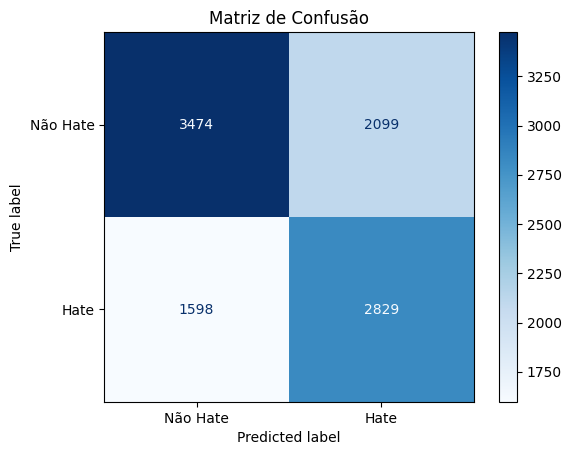


üìä Binary Classification Metrics:
Accuracy: 0.6303
Precision: 0.5741
Recall: 0.6390
F1-Score: 0.6048


In [ ]:
# Mapeamento das classes
class_mapping = {0: "N√£o Hate", 1: "Hate"}

all_targets = []
all_predictions = []

model.to(device)
model.eval()

with torch.no_grad():
    loop = tqdm(test_loader, desc="Evaluating", leave=False)
    for inputs, targets in loop:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_targets.extend(targets.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Substituindo 0 por "N√£o Hate" e 1 por "Hate"
all_targets_mapped = [class_mapping[target] for target in all_targets]
all_predictions_mapped = [class_mapping[pred] for pred in all_predictions]

# Matriz de Confus√£o
cm = confusion_matrix(all_targets_mapped, all_predictions_mapped, labels=["N√£o Hate", "Hate"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["N√£o Hate", "Hate"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confus√£o")
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(all_targets_mapped, all_predictions_mapped)

# Calculate Precision, Recall, and F1-score using the binary average
precision = precision_score(all_targets_mapped, all_predictions_mapped, average='binary', pos_label='Hate')
recall = recall_score(all_targets_mapped, all_predictions_mapped, average='binary', pos_label='Hate')
f1 = f1_score(all_targets_mapped, all_predictions_mapped, average='binary', pos_label='Hate')

# Display the results
print("\nüìä Binary Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# **Treinamento do Modelo BiLSTM com Pesos**

No treinamento do modelo com pesos, o conjunto de dados original √© utilizado, mantendo o desbalanceamento entre as classes "Hate" e "N√£o Hate". O modelo √© treinado com todas as amostras dispon√≠veis, e a fun√ß√£o de perda pode ser ajustada com t√©cnicas como weighted loss (perda ponderada) para garantir que a classe minorit√°ria receba mais aten√ß√£o durante o processo de aprendizado. Essa abordagem permite que o modelo aprenda com o conjunto completo de dados, sem eliminar amostras, o que pode ser vantajoso em alguns cen√°rios. No entanto, o desbalanceamento das classes pode afetar a capacidade do modelo de generalizar corretamente para a classe minorit√°ria, tornando importante a avalia√ß√£o cuidadosa dos resultados obtidos.

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMClassifier(embedding_matrix, hidden_dim=128, output_dim=2).to(device)

label_counts = Counter(train_labels)
total_count = sum(label_counts.values())
class_weights = [total_count / label_counts[i] for i in range(len(label_counts))]
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

best_val_loss = float('inf')
patience = 3
trigger_times = 0

for epoch in range(20):
    model.train()
    running_loss = 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False)

    for inputs, targets in loop:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    train_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}")

    # Evaluate
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for val_inputs_batch, val_targets_batch in val_loader:
            val_inputs_batch, val_targets_batch = val_inputs_batch.to(device), val_targets_batch.to(device)
            val_outputs = model(val_inputs_batch)
            val_loss += criterion(val_outputs, val_targets_batch).item()

    val_loss /= len(val_loader)
    print(f"Epoch {epoch+1}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), f'b_model.pth')
        print("Best model saved.")
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

Epoch 1, Train Loss: 0.5407
Epoch 1, Val Loss: 0.6529
Best model saved.


Epoch 2, Train Loss: 0.4840
Epoch 2, Val Loss: 0.6905


Epoch 3, Train Loss: 0.4447
Epoch 3, Val Loss: 0.7409


Epoch 4, Train Loss: 0.4218
Epoch 4, Val Loss: 0.7610
Early stopping at epoch 4


# **Teste e Matriz de Confus√£o**

Ap√≥s o treinamento, o modelo √© avaliado utilizando um conjunto de dados de teste, que n√£o foi visto durante o treinamento. Isso permite verificar como o modelo generaliza para novos dados e medir a sua capacidade de classificar corretamente os tweets em "Hate" e "N√£o Hate". A avalia√ß√£o √© feita com base em m√©tricas de desempenho, como precis√£o, recall, F1-score e acur√°cia, que ajudam a entender a qualidade das previs√µes do modelo em rela√ß√£o √† classe verdadeira de cada tweet.

Tamb√©m √© gerada uma matriz de confus√£o, uma ferramenta importante para visualizar o desempenho do modelo, mostrando a quantidade de acertos e erros em suas previs√µes. Ela √© uma tabela que compara as classes preditas pelo modelo com as classes reais. A matriz de confus√£o gera quatro valores principais:

    True Positives (TP): Casos onde o modelo previu corretamente a classe "Hate".

    True Negatives (TN): Casos onde o modelo previu corretamente a classe "N√£o Hate".

    False Positives (FP): Casos onde o modelo previu erroneamente a classe "Hate" para tweets que eram "N√£o Hate".

    False Negatives (FN): Casos onde o modelo previu erroneamente a classe "N√£o Hate" para tweets que eram "Hate".

In [34]:
# Mapeamento das classes
class_mapping = {0: "N√£o Hate", 1: "Hate"}

all_targets = []
all_predictions = []

model.to(device)
model.eval()

with torch.no_grad():
    loop = tqdm(test_loader, desc="Evaluating", leave=False)
    for inputs, targets in loop:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_targets.extend(targets.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Substituindo 0 por "N√£o Hate" e 1 por "Hate"
all_targets_mapped = [class_mapping[target] for target in all_targets]
all_predictions_mapped = [class_mapping[pred] for pred in all_predictions]

# Matriz de Confus√£o
cm = confusion_matrix(all_targets_mapped, all_predictions_mapped, labels=["N√£o Hate", "Hate"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["N√£o Hate", "Hate"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confus√£o")
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(all_targets_mapped, all_predictions_mapped)

# Calculate Precision, Recall, and F1-score using the binary average
precision = precision_score(all_targets_mapped, all_predictions_mapped, average='binary', pos_label='Hate')
recall = recall_score(all_targets_mapped, all_predictions_mapped, average='binary', pos_label='Hate')
f1 = f1_score(all_targets_mapped, all_predictions_mapped, average='binary', pos_label='Hate')

# Display the results
print("\nüìä Binary Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


üìä Binary Classification Metrics:
Accuracy: 0.6363
Precision: 0.6916
Recall: 0.3221
F1-Score: 0.4395


# **Resultados**

Foram avaliados dois m√©todos distintos para o treinamento de um classificador BiLSTM com embeddings Word2Vec na tarefa de detec√ß√£o de discurso de √≥dio:
1. Modelo com Balanceamento de Dados

Neste m√©todo, a base de dados de treino foi balanceada para conter uma propor√ß√£o equitativa entre as classes "Hate" e "N√£o Hate". Os principais resultados obtidos na base de teste foram:

    Acur√°cia: 0.6303

    Precis√£o: 0.5741

    Recall: 0.6390

    F1-Score: 0.6048

A matriz de confus√£o mostra um bom equil√≠brio entre verdadeiros positivos e verdadeiros negativos, indicando que o modelo conseguiu generalizar razoavelmente bem para ambas as classes.
2. Modelo com Pondera√ß√£o de Classes

Neste segundo cen√°rio, o modelo foi treinado utilizando a base original (desbalanceada), por√©m com penalidades diferenciadas para as classes por meio do par√¢metro weight na fun√ß√£o de perda. Os resultados na base de teste foram:

    Acur√°cia: 0.6363

    Precis√£o: 0.6916

    Recall: 0.3221

    F1-Score: 0.4395

Observa-se que este modelo tende a priorizar mais a classe majorit√°ria ("N√£o Hate"), resultando em um menor recall, por√©m com leves ganhos na precis√£o.
An√°lise Comparativa

Ambos os m√©todos apresentaram desempenhos competitivos, mas com trade-offs distintos:

    O modelo com balanceamento de dados apresentou maior estabilidade geral nos resultados e menor vi√©s para uma das classes.

    J√° o modelo com pondera√ß√£o de classes destacou-se na precis√£o, por√©m teve seus resultados enviesados para a classe majorit√°ria que era "N√£o Hate".